In [1]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic') 

In [3]:
df.shape

(891, 15)

In [ ]:
abs_freq = df['class'].value_counts()
rel_freq = (abs_freq / df['class'].notna().sum()) * 100
cum_freq = abs_freq.cumsum()

# Combine into a DataFrame
freq_table = pd.DataFrame({
    'Absolute Frequency': abs_freq,
    'Relative Frequency (%)': rel_freq.round(2),
    'Cumulative Frequency': cum_freq
})

total_row = pd.DataFrame({
    'Absolute Frequency': freq_table['Absolute Frequency'].sum(),
    'Relative Frequency (%)': freq_table['Relative Frequency (%)'].sum(),
    'Cumulative Frequency': ''
}, index=['Total'])

freq_table = pd.concat([freq_table, total_row])

freq_table

,Absolute Frequency,Relative Frequency (%),Cumulative Frequency
Third,491,55.11,491
First,216,24.24,707
Second,184,20.65,891
Total,891,100.00,


In [5]:
contingency_table = pd.crosstab(df['sex'], df['survived'], margins=True)

print("Two-Way Contingency Table (Sex vs. Survived)\n")
print(contingency_table)
print("\n" + "="*50 + "\n")

Two-Way Contingency Table (Sex vs. Survived)

survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891




In [6]:
print("Probabilities\n")

total_passengers = contingency_table.loc['All', 'All']

# 1. Joint Probability: P(Sex = female, Survived = 1)
# This is the number of females who survived divided by the total number of passengers.
female_survivors = contingency_table.loc['female', 1]
prob_female_and_survived = female_survivors / total_passengers
print(f"1. Joint Probability P(Sex = female, Survived = 1): {prob_female_and_survived:.4f}")
print(f"   Calculation: {female_survivors} (females who survived) / {total_passengers} (total) = {prob_female_and_survived:.4f}\n")


# 2. Marginal Probabilities
# P(Sex = female)
# This is the total number of females divided by the total number of passengers.
total_female = contingency_table.loc['female', 'All']
prob_female = total_female / total_passengers
print(f"2a. Marginal Probability P(Sex = female): {prob_female:.4f}")
print(f"    Calculation: {total_female} (total females) / {total_passengers} (total) = {prob_female:.4f}\n")

# P(Survived = 1)
# This is the total number of survivors divided by the total number of passengers.
total_survived = contingency_table.loc['All', 1]
prob_survived = total_survived / total_passengers
print(f"2b. Marginal Probability P(Survived = 1): {prob_survived:.4f}")
print(f"    Calculation: {total_survived} (total survivors) / {total_passengers} (total) = {prob_survived:.4f}\n")


# 3. Conditional Probabilities
# P(Survived = 1 | Sex = female)
# This is the probability of survival GIVEN the passenger was female.
# Formula: P(Survived=1 AND Female) / P(Female)
prob_survived_given_female = prob_female_and_survived / prob_female
# Alternative calculation: number of female survivors / total number of females
prob_survived_given_female_alt = female_survivors / total_female
print(f"3a. Conditional Probability P(Survived = 1 | Sex = female): {prob_survived_given_female:.4f}")
print(f"    Calculation: {female_survivors} (females who survived) / {total_female} (total females) = {prob_survived_given_female_alt:.4f}\n")


# P(Sex = female | Survived = 1)
# This is the probability of being female GIVEN the passenger survived.
# Formula: P(Female AND Survived=1) / P(Survived=1)
prob_female_given_survived = prob_female_and_survived / prob_survived
# Alternative calculation: number of female survivors / total number of survivors
prob_female_given_survived_alt = female_survivors / total_survived
print(f"3b. Conditional Probability P(Sex = female | Survived = 1): {prob_female_given_survived:.4f}")
print(f"    Calculation: {female_survivors} (females who survived) / {total_survived} (total survivors) = {prob_female_given_survived_alt:.4f}\n")


Probabilities

1. Joint Probability P(Sex = female, Survived = 1): 0.2615
   Calculation: 233 (females who survived) / 891 (total) = 0.2615

2a. Marginal Probability P(Sex = female): 0.3524
    Calculation: 314 (total females) / 891 (total) = 0.3524

2b. Marginal Probability P(Survived = 1): 0.3838
    Calculation: 342 (total survivors) / 891 (total) = 0.3838

3a. Conditional Probability P(Survived = 1 | Sex = female): 0.7420
    Calculation: 233 (females who survived) / 314 (total females) = 0.7420

3b. Conditional Probability P(Sex = female | Survived = 1): 0.6813
    Calculation: 233 (females who survived) / 342 (total survivors) = 0.6813



In [7]:
df['age'].isna().sum()

np.int64(177)

In [8]:
df['fare'].isna().sum()

np.int64(0)

*Since the number of Na values is large in "age", we fill them in with the median values*

In [9]:
print("Correlation Analysis (Age and Fare)\n")

df_corr = df[['age', 'fare']].copy()

# We fill missing 'age' values with the median age.
age_median = df_corr['age'].median()
df_corr['age'].fillna(age_median, inplace=True)
print(f"Cleaned data by filling {df['age'].isnull().sum()} missing 'age' values with the median age ({age_median}).\n")

# Compute Pearson correlation
pearson_corr = df_corr.corr(method='pearson')
age_fare_corr = pearson_corr.loc['age', 'fare']
print(f"Pearson Correlation between Age and Fare: {age_fare_corr:.4f}\n")

Correlation Analysis (Age and Fare)

Cleaned data by filling 177 missing 'age' values with the median age (28.0).

Pearson Correlation between Age and Fare: 0.0967



C:\Users\aryan\AppData\Local\Temp\ipykernel_11184\1099063667.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corr['age'].fillna(age_median, inplace=True)


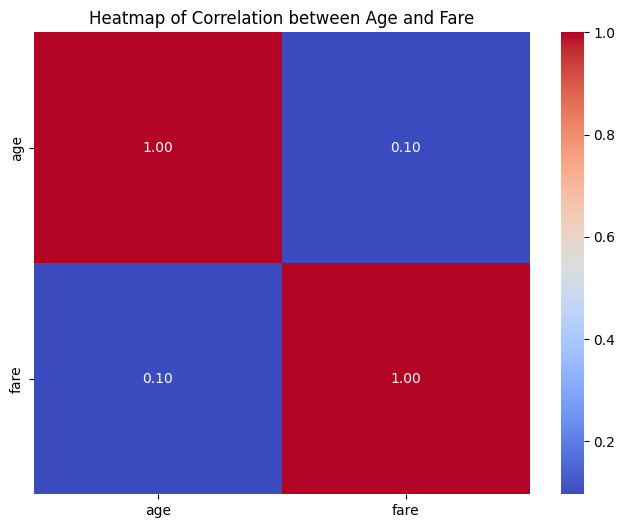

In [10]:
# Visualize using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Age and Fare')
plt.show()

Displaying Pairplot...


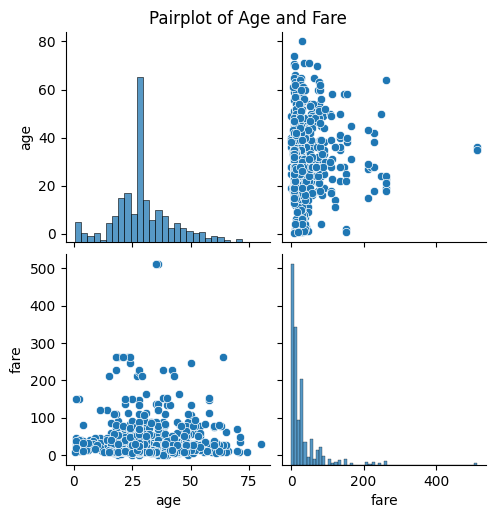

In [ ]:
# Visualize using a pairplot
print("Displaying Pairplot...")
sns.pairplot(df_corr)
plt.suptitle('Pairplot of Age and Fare', y=1.02)
plt.show()

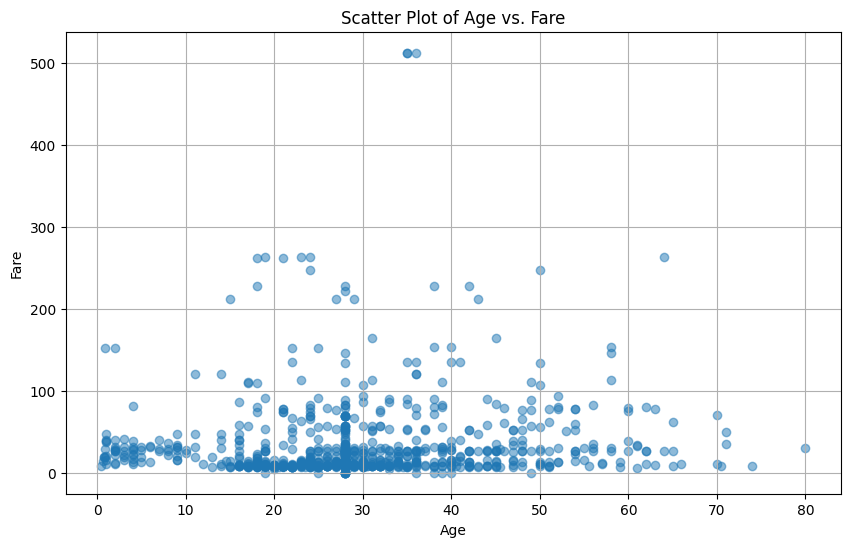

In [12]:
# Visualize using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_corr['age'], df_corr['fare'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

In [13]:
print("Interpretation of Correlation\n")
print(f"The Pearson correlation coefficient between age and fare is {age_fare_corr:.4f}.")
print("Strength: A value close to 0 (like this one) indicates a very weak linear relationship.")
print("Direction: The sign is positive (+), which suggests a slight tendency for fare to increase as age increases, but the relationship is not strong.")
print("\n" + "="*50 + "\n")

Interpretation of Correlation

The Pearson correlation coefficient between age and fare is 0.0967.
Strength: A value close to 0 (like this one) indicates a very weak linear relationship.
Direction: The sign is positive (+), which suggests a slight tendency for fare to increase as age increases, but the relationship is not strong.




In [14]:
print("Bonus :Visualization of Survival by Class\n")

# Create a crosstab of class vs. survived
class_survival = pd.crosstab(df['class'], df['survived'])
print("Crosstab of Class vs. Survived (0=No, 1=Yes):\n")
print(class_survival)
print("\n")

Bonus :Visualization of Survival by Class

Crosstab of Class vs. Survived (0=No, 1=Yes):

survived    0    1
class             
First      80  136
Second     97   87
Third     372  119




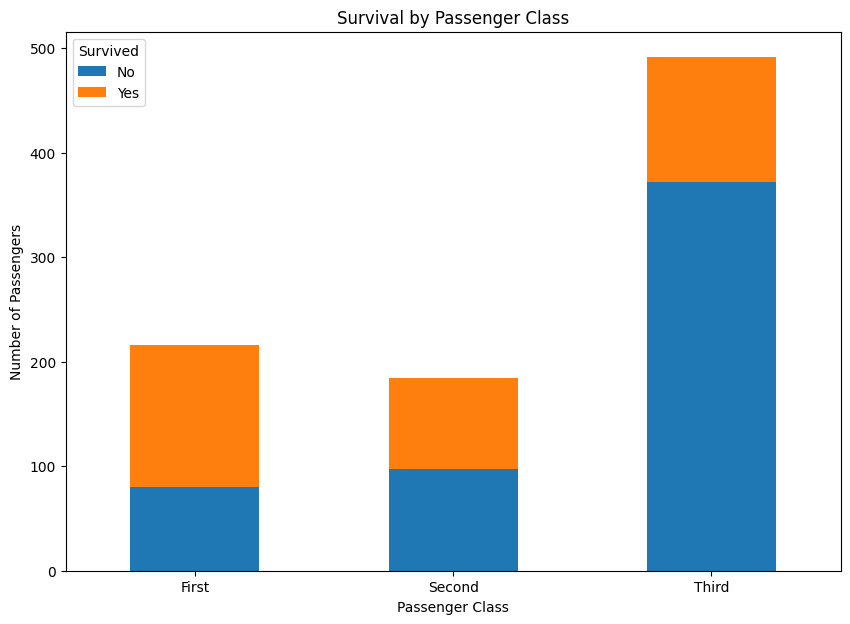

In [15]:
# Create a stacked bar chart
class_survival.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [16]:
# Comment on survival rate
# Calculate survival rate for interpretation
survival_rate = (class_survival[1] / (class_survival[0] + class_survival[1])) * 100
print("Survival Rates by Class:\n")
print(survival_rate.apply(lambda x: f"{x:.2f}%").to_string())
print("\nInterpretation: First class had the highest survival rate, significantly higher than Second and Third class.")

Survival Rates by Class:

class
First     62.96%
Second    47.28%
Third     24.24%

Interpretation: First class had the highest survival rate, significantly higher than Second and Third class.
